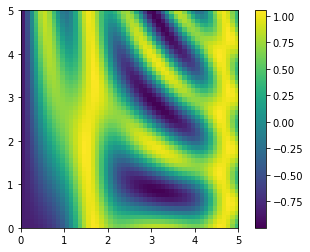

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
cmap='viridis')
plt.colorbar();




In [5]:
import numpy as np
import pandas as pd
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape


(365,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

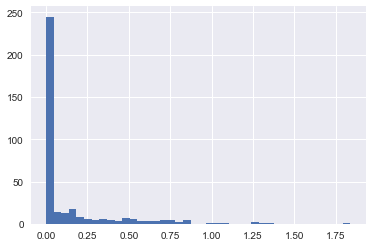

In [7]:
plt.hist(inches, 40);

In [8]:
x = np.array([1,2,3,4,5])
x < 3


array([ True,  True, False, False, False], dtype=bool)

In [9]:
x > 3

array([False, False, False,  True,  True], dtype=bool)

In [10]:
x <= 3 #Less than or equal

array([ True,  True,  True, False, False], dtype=bool)

In [11]:
x >= 3

array([False, False,  True,  True,  True], dtype=bool)

In [12]:
x != 3 #not equal to three

array([ True,  True, False,  True,  True], dtype=bool)

In [13]:
x == 3

array([False, False,  True, False, False], dtype=bool)

In [14]:
(2 * x) == (x **2)

array([False,  True, False, False, False], dtype=bool)

In [15]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [16]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

In [17]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [19]:
#How many values are less than 6?
np.count_nonzero(x < 6)

8

In [20]:
np.sum(x < 6)

8

In [21]:
#How many values are less than 6 in each row?
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [23]:
#Are there any values that are greater than 8>
np.any(x > 8)

True

In [24]:
#Are there any vlaues less than zero>
np.any(x < 0)

False

In [25]:
#Are all values less than 10?
np.all(x < 10)

True

In [26]:
#Are all values equal to 6?
np.all(x == 6)

False

In [29]:
#Are all values in each row less than 8?
np.all(x<8, axis=1)

array([ True, False,  True], dtype=bool)

In [30]:
#Find the number of days where the rainfall was more than 1/2 inches and less than 1 inch
np.sum((inches > 0.5)&(inches <1))

29

In [33]:
#Doing the equiv. with the OR logic operator instead of AND
np.sum(~((inches <= 0.5) | (inches >=1)))

29

In [34]:
print("Number of days without rain:", np.sum(inches ==0))
print("Number of days with rain:", np.sum(inches !=0))
print("Number of days with more than 0.5 inches:",np.sum(inches>0.5))
print("Rainy days with < 0.1 inches:", np.sum((inches>0)&(inches<0.2)))

Number of days without rain: 215
Number of days with rain: 150
Number of days with more than 0.5 inches: 37
Rainy days with < 0.1 inches: 75


In [35]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [36]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

In [37]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [38]:
#construct a mask of all rainy days
rainy = (inches > 0)
#construc a mask of all summer days(June 21st is the 172 day)
summer = (np.arange(365)-172<90)&(np.arange(365)-172>0)
print("Meidan precip on rainy days in 2014(inches):",np.median(inches[rainy]))
print("Median precip of summer days in 2014(inches):",np.median(inches[summer]))
print("Maximum precip on summer days in 2014(inches):",np.max(inches[summer]))
print("Median precip on non-summer rainy days(inches):",np.median(inches[rainy&~summer]))

Meidan precip on rainy days in 2014(inches): 0.194881889764
Median precip of summer days in 2014(inches): 0.0
Maximum precip on summer days in 2014(inches): 0.850393700787
Median precip on non-summer rainy days(inches): 0.200787401575


In [40]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [41]:
[x[3],x[7],x[2]]
#OR
ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [44]:
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [45]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [47]:
#Combining a column vector and a row vector within the indices
X[row[:, np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [48]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [49]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [50]:
#Combining fancy & simple indices
X[2,[2,0,1]]

array([10,  8,  9])

In [51]:
#Combining fancy indexing w/ slicing
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [52]:
#Combining fancy indexing & masking
mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [53]:
mean = [0,0]
cov = [[1,2],[2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

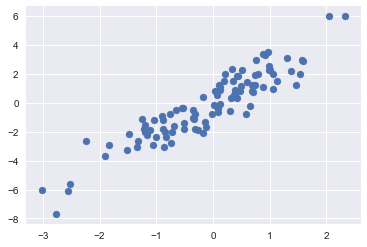

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   #for plot styling
plt.scatter(X[:,0],X[:,1]);

In [56]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([64,  4, 45, 40, 15, 73, 68, 84,  0, 59, 91, 32, 83, 90, 30, 25,  1,
        6,  3, 21])

In [57]:
selection = X[indices]  #Fancy indexing used here
selection.shape

(20, 2)

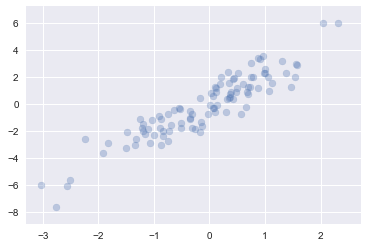

In [59]:
#Circle the points selected from the plot
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1], facecolor='none',s=200);

In [60]:
#Modifying values with fancy indexing
x = np.arange(10)
i = np.array([2,1,8,4])
x[i]=99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [61]:
#Problematic situation
x = np.zeros(10)
x[[0,0]]=[4,6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [62]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [63]:
#If you want operation to be repeated
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


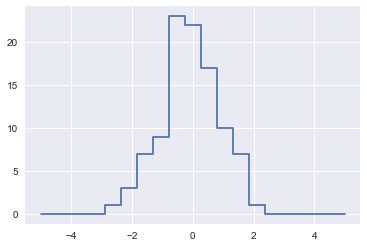

In [64]:
#Binning Data
np.random.seed(42)
x = np.random.randn(100)

#Compute a histogram by hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

#Find the appropriate bin for each x
i = np.searchsorted(bins,x)

#Add 1 to each of these bins
np.add.at(counts,i,1)

#Plot the results
plt.plot(bins, counts, linestyle='steps');

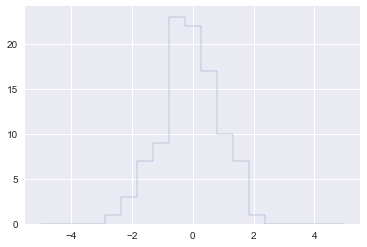

In [65]:
#In a single line
plt.hist(x,bins, histtype='step');

In [66]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x,bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

NumPy routine:
47.6 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
13.8 µs ± 548 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [68]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)


NumPy routine:
62.8 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
95.6 ms ± 4.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
#Simple selection sort repeatedly finds the min value from a list, makes swaps until list is sorted
#Selection Sorting


import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap],x[i])
    return x

x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [70]:
#Bogosort, random sorting, honestly pretty poor sorting method

def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [71]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [72]:
x.sort()
print(x)

[1 2 3 4 5]


In [73]:
#argsort

x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [74]:
x[i]

array([1, 2, 3, 4, 5])

In [75]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [76]:
#Sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [77]:
#sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [78]:
#Partial Sorts: Partitioning. np.partition takes an array and a number K;
#the result is a new array w/ the smallest K value to the left of the
#partition, and the remaining values to the right, in arbitrary order.

x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [79]:
#Partition along an abitrary axis of a multidimensional array
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

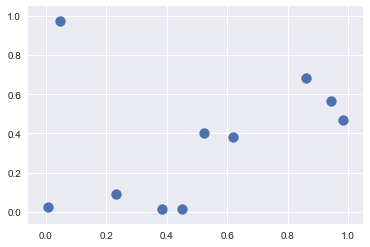

In [80]:
#EXAMPLE: K-nearest neighbors

X = rand.rand(10,2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1],s=100);

In [81]:
#Computing the matix of square distance in a single line of code
Dist_sq = np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:]) **2, axis=-1)

In [84]:
#A Breakdown of the line of code above
#For each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis,:]-X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [85]:
#Square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [86]:
#sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [87]:
#Diagonal of matrix should be zeros
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [88]:
nearest = np. argsort(dist_sq, axis = 1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [89]:
#Partition each row so that the smallest K+1 squared distance comes first,
#W/ larger distances filling the remaining positions of the array.
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)


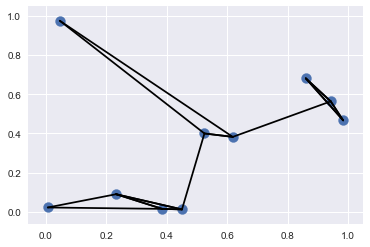

In [92]:
#Visualizing the network of neighbors
plt.scatter(X[:,0],X[:,1], s=100)

#Draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        #Plot a line from X[i] to X[j]
        #Use some zip magic to make it happen:
        plt.plot(*zip(X[j],X[i]), color='black')

In [102]:
#Compount, heterogeneous data

name = ['Alice','Bob', 'Cathy', "Doug"]
age = [25,45,37,19]
weight = [55.0, 85.5, 68.0, 61.5]

x=np.zeros(4,dtype=int)

#Creating a structured array using a compound data type specifications
data = np.zeros(4, dtype={'names':('name','age','weight'),'formats':
                         ('U10','i4', 'f8')})
print(data.dtype)


[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]
[('Alice', 25,  55. ) ('Bob', 45,  85.5) ('Cathy', 37,  68. )
 ('Doug', 19,  61.5)]


In [103]:
#Fill the array with our lists of values
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25,  55. ) ('Bob', 45,  85.5) ('Cathy', 37,  68. )
 ('Doug', 19,  61.5)]


In [105]:
#Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'],
      dtype='<U10')

In [106]:
#Get first row of data
data[0]

('Alice', 25,  55.)

In [107]:
#Get the name from the last row
data[-1]['name']

'Doug'

In [108]:
#Get names where age is under 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'],
      dtype='<U10')

In [109]:
#Structed array data using dictionary method
np.dtype({'names':('names','age','weight'),
         'formats':('U10','i4','f8')})

dtype([('names', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [111]:
np.dtype({'names':('name','age','weight'),
          'formats':((np.str_, 10),int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [112]:
np.dtype([('name','S10'),('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [113]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

In [115]:
#Advanced Compound Types

tp = np.dtype([('id','i8'),('mat','f8',(3,3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[ 0.,  0.,  0.], [ 0.,  0.,  0.], [ 0.,  0.,  0.]])
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [116]:
#Structured Arrays with a Twist
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [118]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

137 ns ± 3.72 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.72 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.62 µs ± 333 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
